In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df_btc = pd.read_csv('BTC-USD.csv')
df_btc.sort_values('Date', inplace=True)
df_btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-11-17,388.348999,410.199005,377.502014,387.407990,387.407990,41518800
1,2014-11-18,387.785004,392.402008,371.117004,375.197998,375.197998,32222500
2,2014-11-19,373.895996,386.480988,373.895996,380.554993,380.554993,18931800
3,2014-11-20,380.307007,382.024994,356.781006,357.839996,357.839996,25233200
4,2014-11-21,357.878998,357.878998,344.112000,350.847992,350.847992,29850100


In [3]:
# Load the fear and greed sentiment data for Bitcoin
df_eth = pd.read_csv('ETH-USD.csv')
df_eth.sort_values('Date', inplace=True)
df_eth.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [4]:
# Load the fear and greed sentiment data for Bitcoin
df_usdt = pd.read_csv('USDT-USD.csv')
df_usdt.sort_values('Date', inplace=True)
df_usdt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,1.01087,1.01327,0.996515,1.00818,1.00818,358188000
1,2017-11-10,1.00650,1.02423,0.995486,1.00601,1.00601,756446016
2,2017-11-11,1.00598,1.02621,0.995799,1.00899,1.00899,746227968
3,2017-11-12,1.00602,1.10591,0.967601,1.01247,1.01247,1466060032
4,2017-11-13,1.00448,1.02929,0.975103,1.00935,1.00935,767884032


In [5]:
btc_trace = go.Scatter(x=df_btc.Date, y=df_btc['Close'], name= 'Price')
btc_trace2 = go.Scatter(x=df_eth.Date, y=df_eth['Close'], name= 'Price')
btc_trace3 = go.Scatter(x=df_usdt.Date, y=df_usdt['Close'], name= 'Price')

py.iplot([btc_trace, btc_trace2, btc_trace3])

In [6]:
df_usdt['Date'] = pd.to_datetime(df_usdt['Date'])
df_eth['Date'] = pd.to_datetime(df_eth['Date'])
df_btc['Date'] = pd.to_datetime(df_btc['Date'])

In [7]:
monthvise_high = df_btc.groupby(df_btc['Date'].dt.strftime('%Y'))['High'].max()
#monthvise_high = monthvise_high.reindex(list(range(len(monthvise_high))), axis=0)

monthvise_low = df_btc.groupby(df_btc['Date'].dt.strftime('%Y'))['Low'].min()
#monthvise_low = monthvise_low.reindex(list(range(len(monthvise_high))), axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', title='BTC yearwise High and Low stock price')
fig.show()

In [8]:
monthvise_high = df_eth.groupby(df_eth['Date'].dt.strftime('%Y'))['High'].max()
#monthvise_high = monthvise_high.reindex(list(range(len(monthvise_high))), axis=0)

monthvise_low = df_eth.groupby(df_eth['Date'].dt.strftime('%Y'))['Low'].min()
#monthvise_low = monthvise_low.reindex(list(range(len(monthvise_high))), axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', title='ETH yearwise High and Low stock price')
fig.show()

In [9]:
monthvise_high = df_usdt.groupby(df_usdt['Date'].dt.strftime('%Y'))['High'].max()
#monthvise_high = monthvise_high.reindex(list(range(len(monthvise_high))), axis=0)

monthvise_low = df_usdt.groupby(df_usdt['Date'].dt.strftime('%Y'))['Low'].min()
#monthvise_low = monthvise_low.reindex(list(range(len(monthvise_high))), axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', title='USDT yearwise High and Low stock price')
fig.show()

In [10]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [11]:
dataset_usdt = df_usdt['Close'].to_list()
dataset_eth = df_eth['Close'].to_list()
dataset_btc = df_btc['Close'].to_list()

In [12]:
n_steps = 7

X_usdt, y_usdt = split_sequence(dataset_usdt, n_steps=n_steps)
X_eth, y_eth = split_sequence(dataset_eth, n_steps=n_steps)
X_btc, y_btc = split_sequence(dataset_btc, n_steps=n_steps)

In [13]:
n_features = 1

In [14]:
X_usdt = X_usdt.reshape((X_usdt.shape[0], X_usdt.shape[1], n_features))
X_eth = X_eth.reshape((X_eth.shape[0], X_eth.shape[1], n_features))
X_btc = X_btc.reshape((X_btc.shape[0], X_btc.shape[1], n_features))

In [15]:
X_usdt_train, X_usdt_test, y_usdt_train, y_usdt_test = train_test_split(X_usdt, y_usdt, test_size=0.1, random_state=42)
X_eth_train, X_eth_test, y_eth_train, y_eth_test = train_test_split(X_eth, y_eth, test_size=0.1, random_state=42)
X_btc_train, X_btc_test, y_btc_train, y_btc_test = train_test_split(X_btc, y_btc, test_size=0.1, random_state=42)

In [16]:
def stacked_lstm():
           
  # define model
  model = Sequential()
  model.add(LSTM(300, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
  model.add(LSTM(250, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
  model.add(LSTM(100, activation='relu'))
  model.add(Dense(1))
  
  return model

In [19]:
model_btc = stacked_lstm()
model_eth = stacked_lstm()
model_usdt = stacked_lstm()

model_btc.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='mse')
model_eth.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='mse')
model_usdt.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='mse')

In [20]:

#callbacks
checkpoiter = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Cryptocurrency prediction/BTC.hdf5', verbose = 1, save_best_only = True,  monitor='val_loss', mode='min')
early_stop = [tf.keras.callbacks.EarlyStopping(patience = 15, monitor = 'val_loss') ]
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.000001)

history = model_btc.fit(X_btc_train, y_btc_train, epochs=200, verbose=1, validation_split=0.1, callbacks=[checkpoiter,
                                                                                    early_stop, reduce_lr])

Epoch 1/200
73/74 [============================>.] - ETA: 0s - loss: 426675968.0000
Epoch 1: val_loss improved from inf to 416348224.00000, saving model to /content/drive/MyDrive/Cryptocurrency prediction/BTC.hdf5
74/74 [==============================] - 9s 71ms/step - loss: 426489280.0000 - val_loss: 416348224.0000 - lr: 1.0000e-04
Epoch 2/200
73/74 [============================>.] - ETA: 0s - loss: 255571408.0000
Epoch 2: val_loss improved from 416348224.00000 to 4205380.00000, saving model to /content/drive/MyDrive/Cryptocurrency prediction/BTC.hdf5
74/74 [==============================] - 4s 56ms/step - loss: 254673600.0000 - val_loss: 4205380.0000 - lr: 1.0000e-04
Epoch 3/200
73/74 [============================>.] - ETA: 0s - loss: 4247120.0000
Epoch 3: val_loss improved from 4205380.00000 to 2813367.50000, saving model to /content/drive/MyDrive/Cryptocurrency prediction/BTC.hdf5
74/74 [==============================] - 4s 54ms/step - loss: 4236655.0000 - val_loss: 2813367.5000 - 

In [21]:
model_btc.load_weights('/content/drive/MyDrive/Cryptocurrency prediction/BTC.hdf5')                     
model_btc.save('/content/drive/MyDrive/Cryptocurrency prediction/BTC.h5')            

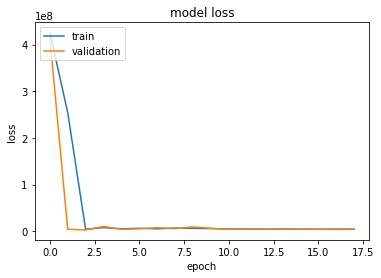

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [30]:
yhat_btc = model_btc.predict(X_btc_test)
yhat_btc = yhat_btc.reshape(yhat_btc.shape[0])

btc_trace = go.Scatter(x=list(df_btc['Date'].astype(str)[-100:]), y=yhat_btc[-100:], name= 'Predicted Price')
btc_trace2 = go.Scatter(x=list(df_btc['Date'].astype(str)[-100:]), y=y_btc_test[-100:], name= 'Real Price')

py.iplot([btc_trace, btc_trace2])


10/10 [==============================] - 0s 21ms/step


In [31]:

#callbacks
checkpoiter = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Cryptocurrency prediction/ETH.hdf5', verbose = 1, save_best_only = True,  monitor='val_loss', mode='min')

history_eth = model_eth.fit(X_btc_train, y_btc_train, epochs=200, verbose=1, validation_split=0.1, callbacks=[checkpoiter,
                                                                                    early_stop, reduce_lr])

Epoch 1/200
73/74 [============================>.] - ETA: 0s - loss: 408496160.0000
Epoch 1: val_loss improved from inf to 382884032.00000, saving model to /content/drive/MyDrive/Cryptocurrency prediction/ETH.hdf5
74/74 [==============================] - 9s 66ms/step - loss: 407970496.0000 - val_loss: 382884032.0000 - lr: 1.0000e-04
Epoch 2/200
74/74 [==============================] - ETA: 0s - loss: 126696448.0000
Epoch 2: val_loss improved from 382884032.00000 to 29442186.00000, saving model to /content/drive/MyDrive/Cryptocurrency prediction/ETH.hdf5
74/74 [==============================] - 5s 61ms/step - loss: 126696448.0000 - val_loss: 29442186.0000 - lr: 1.0000e-04
Epoch 3/200
73/74 [============================>.] - ETA: 0s - loss: 10701441.0000
Epoch 3: val_loss improved from 29442186.00000 to 5377155.00000, saving model to /content/drive/MyDrive/Cryptocurrency prediction/ETH.hdf5
74/74 [==============================] - 5s 62ms/step - loss: 10728892.0000 - val_loss: 5377155.00

In [33]:
model_eth.load_weights('/content/drive/MyDrive/Cryptocurrency prediction/ETH.hdf5')                     
model_eth.save('/content/drive/MyDrive/Cryptocurrency prediction/ETH.h5')            

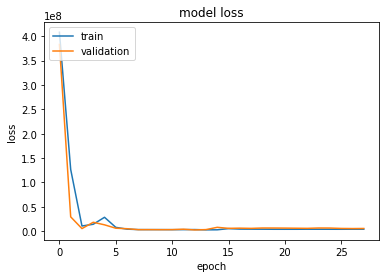

In [34]:
# summarize history for loss
plt.plot(history_eth.history['loss'])
plt.plot(history_eth.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [39]:
yhat_eth = model_eth.predict(X_eth_test)
yhat_eth = yhat_eth.reshape(yhat_eth.shape[0])

eth_trace = go.Scatter(x=list(df_eth['Date'].astype(str)[-100:]), y=yhat_eth[-100:], name= 'Predicted Price')
eth_trace2 = go.Scatter(x=list(df_eth['Date'].astype(str)[-100:]), y=y_eth_test[-100:], name= 'Real Price')

py.iplot([eth_trace, eth_trace2])

6/6 [==============================] - 0s 33ms/step


In [40]:

#callbacks
checkpoiter = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Cryptocurrency prediction/USDT.hdf5', verbose = 1, save_best_only = True,  monitor='val_loss', mode='min')

history_usdt = model_usdt.fit(X_usdt_train, y_usdt_train, epochs=200, verbose=1, validation_split=0.1, callbacks=[checkpoiter,
                                                                                    early_stop, reduce_lr])

Epoch 1/200
46/46 [==============================] - ETA: 0s - loss: 0.8617
Epoch 1: val_loss improved from inf to 0.63380, saving model to /content/drive/MyDrive/Cryptocurrency prediction/USDT.hdf5
46/46 [==============================] - 7s 77ms/step - loss: 0.8617 - val_loss: 0.6338 - lr: 1.0000e-04
Epoch 2/200
45/46 [============================>.] - ETA: 0s - loss: 0.2010
Epoch 2: val_loss improved from 0.63380 to 0.00655, saving model to /content/drive/MyDrive/Cryptocurrency prediction/USDT.hdf5
46/46 [==============================] - 3s 65ms/step - loss: 0.1978 - val_loss: 0.0065 - lr: 1.0000e-04
Epoch 3/200
46/46 [==============================] - ETA: 0s - loss: 0.0015
Epoch 3: val_loss improved from 0.00655 to 0.00002, saving model to /content/drive/MyDrive/Cryptocurrency prediction/USDT.hdf5
46/46 [==============================] - 3s 57ms/step - loss: 0.0015 - val_loss: 2.2701e-05 - lr: 1.0000e-04
Epoch 4/200
46/46 [==============================] - ETA: 0s - loss: 3.4547e

In [41]:
model_usdt.load_weights('/content/drive/MyDrive/Cryptocurrency prediction/USDT.hdf5')                     
model_usdt.save('/content/drive/MyDrive/Cryptocurrency prediction/USDT.h5')            

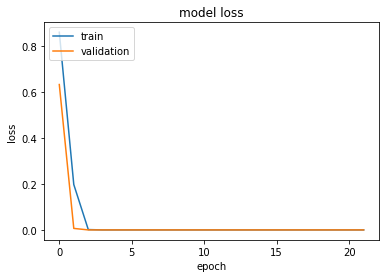

In [42]:
# summarize history for loss
plt.plot(history_usdt.history['loss'])
plt.plot(history_usdt.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [44]:
yhat_usdt = model_usdt.predict(X_usdt_test)
yhat_usdt = yhat_usdt.reshape(yhat_usdt.shape[0])

usdt_trace = go.Scatter(x=list(df_usdt['Date'].astype(str)[-100:]), y=yhat_usdt[-100:], name= 'Predicted Price')
usdt_trace2 = go.Scatter(x=list(df_usdt['Date'].astype(str)[-100:]), y=y_usdt_test[-100:], name= 'Real Price')

py.iplot([usdt_trace, usdt_trace2])

6/6 [==============================] - 0s 18ms/step
